In [25]:
from pandas import read_csv, Series

In [35]:
dname = "/uscms/home/srosenzw/nobackup/workarea/higgs/sixb_analysis/CMSSW_10_2_18/src/HiggsAnalysis/CombinedLimit/datacards/feynnet/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg"

In [36]:
flimits = [f"{dname}/{d}/limits.txt" for d in os.listdir(dname) if '.' not in d]

In [37]:
flimits[0]

'/uscms/home/srosenzw/nobackup/workarea/higgs/sixb_analysis/CMSSW_10_2_18/src/HiggsAnalysis/CombinedLimit/datacards/feynnet/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/all_minus_Norm/limits.txt'

In [38]:
df = read_csv("/uscms/home/srosenzw/nobackup/workarea/higgs/sixb_analysis/CMSSW_10_2_18/src/HiggsAnalysis/CombinedLimit/limits/feynnet/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg.txt", delimiter=' ')
df = df.sort_values(['mx'])
nominal = df['mean'].to_numpy()
nominal

array([249.6 , 230.85, 191.01, 140.04, 174.03, 166.98, 109.56, 118.95,
       106.65, 118.95,  83.49,  81.15,  77.04,  72.36,  87.9 ,  64.44,
        54.63,  68.25,  59.76,  66.51, 260.16,  55.65,  43.35,  44.82,
        46.86,  42.93,  51.72,  41.01,  35.73,  34.41,  34.86,  35.01,
        40.14,  46.59,  34.41,  28.26,  27.24,  27.54,  30.03,  39.54,
        29.16,  23.73,  23.58,  27.24,  33.99,  22.41,  23.01,  22.71,
        28.26,  25.5 ,  21.54,  20.22,  33.24,  19.35,  20.07,  21.96,
        19.47,  17.13,  16.56,  21.84,  17.73,  15.96,  17.13,  19.77,
        16.41,  14.79,  12.45,  25.05,  13.32,  14.79,  13.17,  12.75,
        12.75,  18.03,   8.79,   7.17,   8.07,  18.9 ,   7.17,   7.17,
         7.62,   9.24,  11.88,   7.77,  17.58,   6.  ,   5.43,   4.53,
         4.26,   6.  ,   8.94,   4.83,   4.26,   4.53,   4.83])

In [39]:
limitDict = {}
onlySystName = ['nominal']
allSystName = ['nominal']
only_mx_1000 = np.array((nominal[2],))
only_mx_850 = np.array((nominal[1],))
only_mx_500 = np.array((nominal[0],))
all_mx_1000 = np.array((nominal[2],))
all_mx_850 = np.array((nominal[1],))
all_mx_500 = np.array((nominal[0],))
for f in flimits:
    name = f.split('/')[-2]
    print(name)
    try: df = read_csv(f, delimiter=' ')
    except: continue
    df = df.sort_values(['mx'])
    print(df)
    break
    limitDict[name] = df['mean'].to_numpy()

    if 'only' in name:
        onlySystName.append(name)
        only_mx_500 = np.append(only_mx_500, df['mean'].to_numpy()[0])
        only_mx_850 = np.append(only_mx_850, df['mean'].to_numpy()[1])
        only_mx_1000 = np.append(only_mx_1000, df['mean'].to_numpy()[2])
    else:
        allSystName.append(name)
        all_mx_500 = np.append(all_mx_500, df['mean'].to_numpy()[0])
        all_mx_850 = np.append(all_mx_850, df['mean'].to_numpy()[1])
        all_mx_1000 = np.append(all_mx_1000, df['mean'].to_numpy()[2])
limitDict['nominal'] = nominal
# mx_500['nominal'] = nominal[0]
# mx_850['nominal'] = nominal[1]
# mx_1000['nominal'] = nominal[2]

all_minus_Norm
Empty DataFrame
Columns: [mx, my, -2sigma, -1sigma, mean, +1sigma, +2sigma]
Index: []


In [30]:
df_all_500 = Series(all_mx_500, index=allSystName)
df_all_500 = df_all_500.sort_values(ascending=False)

df_all_850 = Series(all_mx_850, index=allSystName)
df_all_850 = df_all_850.sort_values(ascending=False)

df_all_1000 = Series(all_mx_1000, index=allSystName)
df_all_1000 = df_all_1000.sort_values(ascending=False)

In [31]:
df_all_500

nominal                          249.60
all_minus_HF_2018                 87.00
all_minus_BTagLFStats2            87.00
all_minus_BTagLFStats1            87.00
all_minus_BTagHFStats2            87.00
all_minus_BTagHFStats1            87.00
all_minus_BTagLF                  87.00
all_minus_BTagHF                  87.00
all_minus_Pileup                  87.00
all_minus_RelativeSample_2018     87.00
all_minus_RelativeBal             87.00
all_minus_jer_pt                  87.00
all_minus_HF                      87.00
all_minus_EC2_2018                87.00
all_minus_EC2                     87.00
all_minus_BBEC1_2018              87.00
all_minus_BBEC1                   87.00
all_minus_Absolute_2018           87.00
all_minus_Absolute                87.00
all_minus_FlavorQCD               86.73
all_minus_Norm                    86.73
all_minus_PUID                    86.73
all_minus_Lumi                    86.73
all_minus_bJER                    86.13
all_minus_CRShift                 84.96


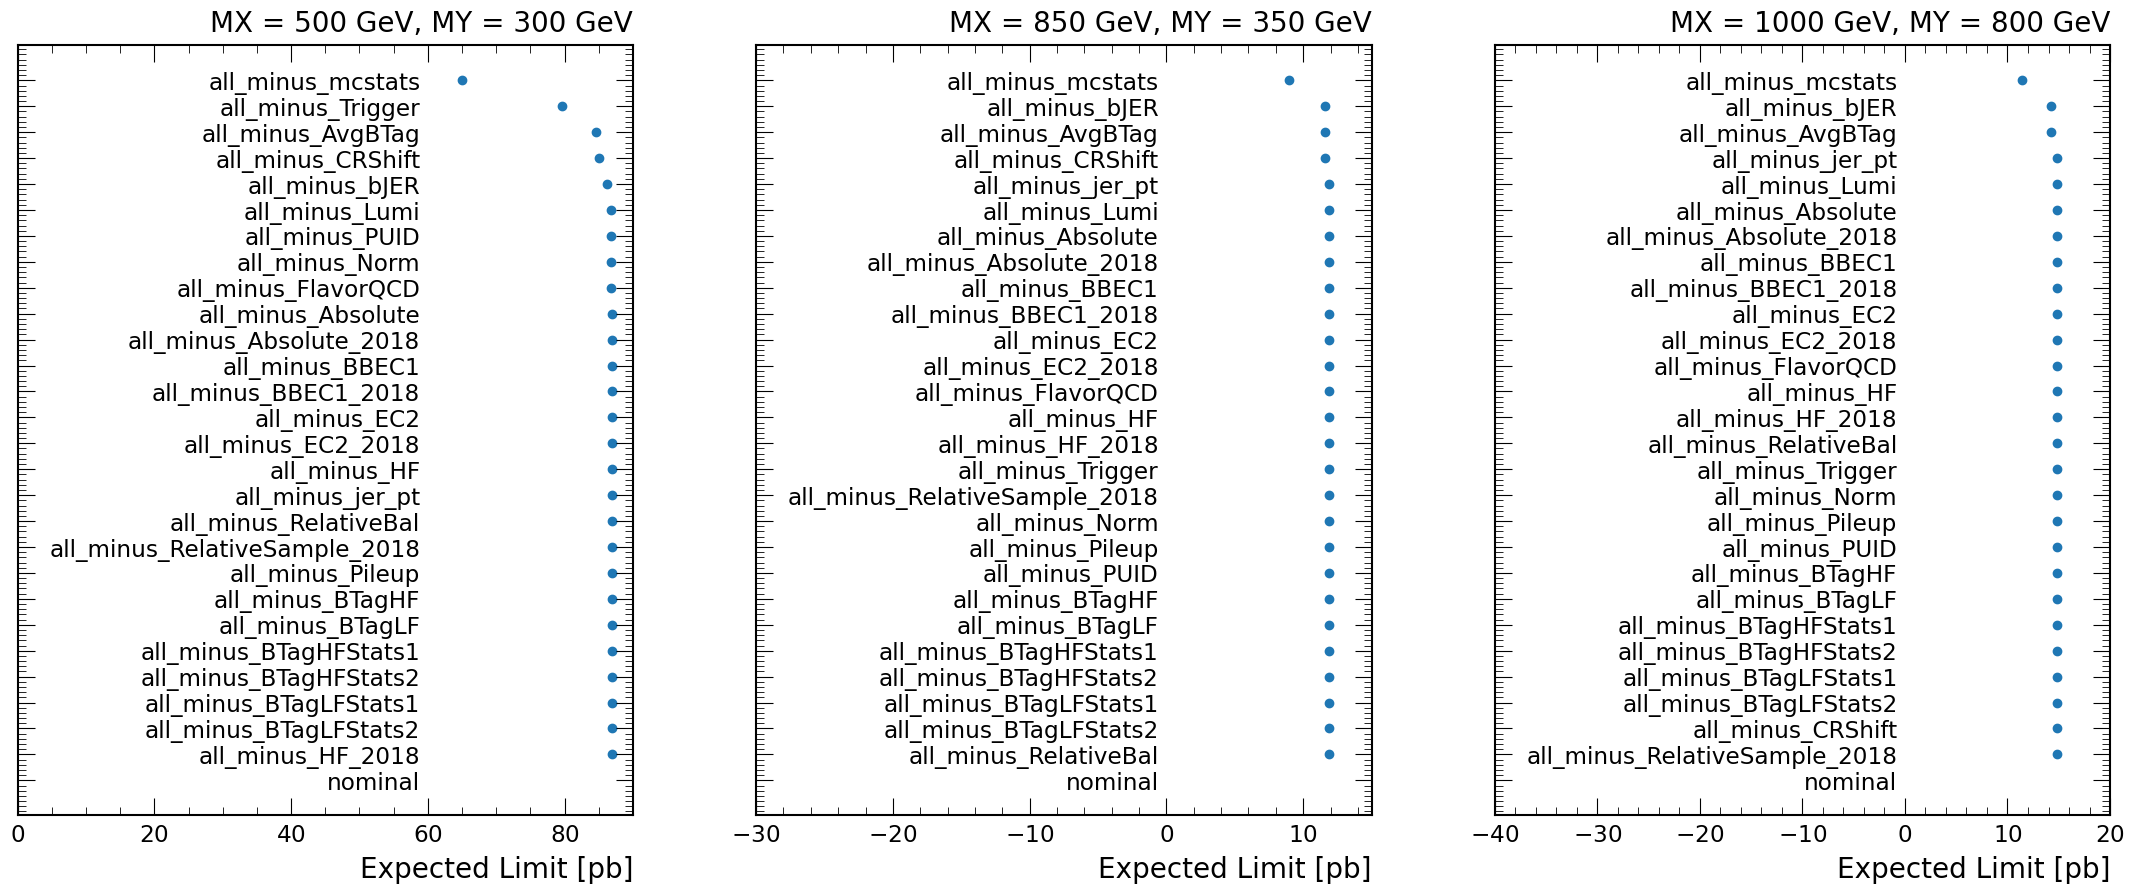

In [8]:
fig, axs = plt.subplots(ncols=3, figsize=(27,10))

ax = axs[0]
ax.scatter(df_all_500.values, df_all_500.index)
ax.set_xlim(0, 90)
ax.set_title('MX = 500 GeV, MY = 300 GeV')
# for i,val in enumerate(df_all_500.values):
    # ax.text(90, i, val, va='center')

ax = axs[1]
ax.scatter(df_all_850.values, df_all_850.index)
ax.set_xlim(-30, 15)
ax.set_title('MX = 850 GeV, MY = 350 GeV')

ax = axs[2]
ax.scatter(df_all_1000.values, df_all_1000.index)
ax.set_xlim(-40, 20)
ax.set_title('MX = 1000 GeV, MY = 800 GeV')

for ax in axs.flatten():
    ax.set_xlabel('Expected Limit [pb]')
    ax.tick_params(axis='y', pad=-290)

fig.savefig('plots/systematics/effects_on_limits.pdf', bbox_inches='tight')

In [19]:
from pandas import DataFrame, option_context

In [4]:
path = '/uscms/home/srosenzw/nobackup/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/combine/feynnet/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/datacards/no_systematics/limits.txt'

with open(path) as f:
   lines = f.readlines()
lines[1:] = [line[:-2] for line in lines[1:]]

cols = lines[0][:-1].split(' ')
data = lines[1:]
data = [line.split(' ') for line in data]

for i,line in enumerate(data):
   if '' in line: continue
   if line == '\n': continue
   numbers = [float(num) for num in line]
   data[i] = numbers

# data = [line.split[' '] for line in data]
# print(data)

df_nosyst = DataFrame(data, columns=cols)

data = np.hstack([line for line in data]).reshape(len(data),len(data[0]))
my = data[:,1]

df_nosyst = df_nosyst.astype({key:int for key in cols[:2]})
df_nosyst = df_nosyst.set_index(cols[:2])
df_nosyst = df_nosyst.sort_index()

print(df_nosyst)

           -2sigma  -1sigma    mean  +1sigma  +2sigma
mx   my                                              
400  250     71.76   102.75  157.02   246.54    369.2
450  250     59.22    80.73  116.61   170.52    240.2
     300     71.10    96.96  140.04   204.78    288.5
500  250     42.03    56.67   80.28   114.51    156.5
     300     50.67    68.07   96.09   137.07    187.3
...            ...      ...     ...      ...      ...
1200 600      1.59     2.25    3.36     4.98      7.3
     700      1.59     2.37    3.36     4.98      7.3
     800      1.59     2.37    3.36     5.19      7.5
     900      1.71     2.58    3.66     5.64      8.1
     1000     2.28     3.15    4.83     7.08     10.2

[96 rows x 5 columns]


In [6]:
path = '/uscms/home/srosenzw/nobackup/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/combine/feynnet/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/limits.txt'

with open(path) as f:
   lines = f.readlines()
lines[1:] = [line[:-2] for line in lines[1:]]

cols = lines[0][:-1].split(' ')
data = lines[1:]
data = [line.split(' ') for line in data]

for i,line in enumerate(data):
   if '' in line: continue
   if line == '\n': continue
   numbers = [float(num) for num in line]
   data[i] = numbers

# data = [line.split[' '] for line in data]
# print(data)

df = DataFrame(data, columns=cols)

data = np.hstack([line for line in data]).reshape(len(data),len(data[0]))
my = data[:,1]

df = df.astype({key:int for key in cols[:2]})
df = df.set_index(cols[:2])
df = df.sort_index()

print(df)

           -2sigma  -1sigma    mean  +1sigma  +2sigma
mx   my                                              
400  250    100.44   149.37  249.60   462.54    756.7
450  250     88.80   124.74  191.01   315.87    533.2
     300    107.31   150.75  230.85   383.61    647.2
500  250     68.94    94.77  140.04   218.19    341.4
     300     85.65   117.42  174.03   271.14    426.3
...            ...      ...     ...      ...      ...
1200 600      1.98     2.97    4.26     6.54      9.8
     700      2.25     2.88    4.26     6.54      9.8
     800      2.13     3.03    4.53     6.72      9.9
     900      2.34     3.27    4.83     7.38     10.9
     1000     2.91     4.17    6.00     9.27     13.8

[95 rows x 5 columns]


In [14]:
ratio = df_nosyst/df

In [15]:
ratio.min(), ratio.max()

(-2sigma    0.571918
 -1sigma    0.567450
 mean       0.552146
 +1sigma    0.505532
 +2sigma    0.439362
 dtype: float64,
 -2sigma    0.803030
 -1sigma    0.822917
 mean       0.807947
 +1sigma    0.779935
 +2sigma    0.780000
 dtype: float64)

In [18]:
display(ratio.where(ratio==ratio.min())), ratio.where(ratio==ratio.max())

-2sigma  -1sigma      mean   +1sigma   +2sigma
mx   my                                                  
400  250       NaN      NaN       NaN       NaN       NaN
450  250       NaN      NaN       NaN       NaN       NaN
     300       NaN      NaN       NaN       NaN       NaN
500  250       NaN      NaN       NaN       NaN       NaN
     300       NaN      NaN  0.552146  0.505532  0.439362
...            ...      ...       ...       ...       ...
1200 600       NaN      NaN       NaN       NaN       NaN
     700       NaN      NaN       NaN       NaN       NaN
     800       NaN      NaN       NaN       NaN       NaN
     900       NaN      NaN       NaN       NaN       NaN
     1000      NaN      NaN       NaN       NaN       NaN

[96 rows x 5 columns]

(None,
            -2sigma   -1sigma  mean  +1sigma  +2sigma
 mx   my                                             
 400  250       NaN       NaN   NaN      NaN      NaN
 450  250       NaN       NaN   NaN      NaN      NaN
      300       NaN       NaN   NaN      NaN      NaN
 500  250       NaN       NaN   NaN      NaN      NaN
      300       NaN       NaN   NaN      NaN      NaN
 ...            ...       ...   ...      ...      ...
 1200 600   0.80303       NaN   NaN      NaN      NaN
      700       NaN  0.822917   NaN      NaN      NaN
      800       NaN       NaN   NaN      NaN      NaN
      900       NaN       NaN   NaN      NaN      NaN
      1000      NaN       NaN   NaN      NaN      NaN
 
 [96 rows x 5 columns])

In [24]:
with option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(ratio.where(ratio==ratio.min())), display(ratio.where(ratio==ratio.max()))

-2sigma  -1sigma      mean   +1sigma   +2sigma
mx   my                                                   
400  250        NaN      NaN       NaN       NaN       NaN
450  250        NaN      NaN       NaN       NaN       NaN
     300        NaN      NaN       NaN       NaN       NaN
500  250        NaN      NaN       NaN       NaN       NaN
     300        NaN      NaN  0.552146  0.505532  0.439362
     350        NaN      NaN       NaN       NaN       NaN
550  250        NaN      NaN       NaN       NaN       NaN
     300   0.571918      NaN       NaN       NaN       NaN
     350        NaN      NaN       NaN       NaN       NaN
     400        NaN  0.56745       NaN       NaN       NaN
600  250        NaN      NaN       NaN       NaN       NaN
     300        NaN      NaN       NaN       NaN       NaN
     350        NaN      NaN       NaN       NaN       NaN
     400        NaN      NaN       NaN       NaN       NaN
     450        NaN      NaN       NaN       NaN       NaN
650  250        NaN      NaN       NaN       NaN       NaN
     300        NaN      NaN       NaN       NaN       NaN
     350        NaN      NaN       NaN       NaN       NaN
     400        NaN      NaN       NaN       NaN       NaN
     450        NaN      NaN       NaN       NaN       NaN
     500        NaN      NaN       NaN       NaN       NaN
700  250        NaN      NaN       NaN       NaN       NaN
     300        NaN      NaN       NaN       NaN       NaN
     350        NaN      NaN       NaN       NaN       NaN
     400        NaN      NaN       NaN       NaN       NaN
     450        NaN      NaN       NaN       NaN       NaN
     500        NaN      NaN       NaN       NaN       NaN
750  250        NaN      NaN       NaN       NaN       NaN
     300        NaN      NaN       NaN       NaN       NaN
     350        NaN      NaN       NaN       NaN       NaN
     400        NaN      NaN       NaN       NaN       NaN
     450        NaN      NaN       NaN       NaN       NaN
     500        NaN      NaN       NaN       NaN       NaN
     600        NaN      NaN       NaN       NaN       NaN
800  250        NaN      NaN       NaN       NaN       NaN
     300        NaN      NaN       NaN       NaN       NaN
     350        NaN      NaN       NaN       NaN       NaN
     400        NaN      NaN       NaN       NaN       NaN
     450        NaN      NaN       NaN       NaN       NaN
     500        NaN      NaN       NaN       NaN       NaN
     600        NaN      NaN       NaN       NaN       NaN
850  250        NaN      NaN       NaN       NaN       NaN
     300        NaN      NaN       NaN       NaN       NaN
     350        NaN      NaN       NaN       NaN       NaN
     400        NaN      NaN       NaN       NaN       NaN
     450        NaN      NaN       NaN       NaN       NaN
     500        NaN      NaN       NaN       NaN       NaN
     600        NaN      NaN       NaN       NaN       NaN
     700        NaN      NaN       NaN       NaN       NaN
900  250        NaN      NaN       NaN       NaN       NaN
     300        NaN      NaN       NaN       NaN       NaN
     350        NaN      NaN       NaN       NaN       NaN
     400        NaN      NaN       NaN       NaN       NaN
     450        NaN      NaN       NaN       NaN       NaN
     500        NaN      NaN       NaN       NaN       NaN
     600        NaN      NaN       NaN       NaN       NaN
     700        NaN      NaN       NaN       NaN       NaN
950  250        NaN      NaN       NaN       NaN       NaN
     300        NaN      NaN       NaN       NaN       NaN
     350        NaN      NaN       NaN       NaN       NaN
     400        NaN      NaN       NaN       NaN       NaN
     450        NaN      NaN       NaN       NaN       NaN
     500        NaN      NaN       NaN       NaN       NaN
     600        NaN      NaN       NaN       NaN       NaN
     700        NaN      NaN       NaN       NaN       NaN
     800        NaN      NaN       NaN       NaN       NaN


-2sigma   -1sigma      mean   +1sigma  +2sigma
mx   my                                                  
400  250       NaN       NaN       NaN       NaN      NaN
450  250       NaN       NaN       NaN       NaN      NaN
     300       NaN       NaN       NaN       NaN      NaN
500  250       NaN       NaN       NaN       NaN      NaN
     300       NaN       NaN       NaN       NaN      NaN
     350       NaN       NaN       NaN       NaN      NaN
550  250       NaN       NaN       NaN       NaN      NaN
     300       NaN       NaN       NaN       NaN      NaN
     350       NaN       NaN       NaN       NaN      NaN
     400       NaN       NaN       NaN       NaN      NaN
600  250       NaN       NaN       NaN       NaN      NaN
     300       NaN       NaN       NaN       NaN      NaN
     350       NaN       NaN       NaN       NaN      NaN
     400       NaN       NaN       NaN       NaN      NaN
     450       NaN       NaN       NaN       NaN      NaN
650  250       NaN       NaN       NaN       NaN      NaN
     300       NaN       NaN       NaN       NaN      NaN
     350       NaN       NaN       NaN       NaN      NaN
     400       NaN       NaN       NaN       NaN      NaN
     450       NaN       NaN       NaN       NaN      NaN
     500       NaN       NaN       NaN       NaN      NaN
700  250       NaN       NaN       NaN       NaN      NaN
     300       NaN       NaN       NaN       NaN      NaN
     350       NaN       NaN       NaN       NaN      NaN
     400       NaN       NaN       NaN       NaN      NaN
     450       NaN       NaN       NaN       NaN      NaN
     500       NaN       NaN       NaN       NaN      NaN
750  250       NaN       NaN       NaN       NaN      NaN
     300       NaN       NaN       NaN       NaN      NaN
     350       NaN       NaN       NaN       NaN      NaN
     400       NaN       NaN       NaN       NaN      NaN
     450       NaN       NaN       NaN       NaN      NaN
     500       NaN       NaN       NaN       NaN      NaN
     600       NaN       NaN       NaN       NaN      NaN
800  250       NaN       NaN       NaN       NaN      NaN
     300       NaN       NaN       NaN       NaN      NaN
     350       NaN       NaN       NaN       NaN      NaN
     400       NaN       NaN       NaN       NaN      NaN
     450       NaN       NaN       NaN       NaN      NaN
     500       NaN       NaN       NaN       NaN      NaN
     600       NaN       NaN       NaN       NaN      NaN
850  250       NaN       NaN       NaN       NaN      NaN
     300       NaN       NaN       NaN       NaN      NaN
     350       NaN       NaN       NaN       NaN      NaN
     400       NaN       NaN       NaN       NaN      NaN
     450       NaN       NaN       NaN       NaN      NaN
     500       NaN       NaN       NaN       NaN      NaN
     600       NaN       NaN       NaN       NaN      NaN
     700       NaN       NaN       NaN       NaN      NaN
900  250       NaN       NaN       NaN       NaN      NaN
     300       NaN       NaN       NaN       NaN      NaN
     350       NaN       NaN       NaN       NaN      NaN
     400       NaN       NaN       NaN       NaN      NaN
     450       NaN       NaN       NaN       NaN      NaN
     500       NaN       NaN       NaN       NaN      NaN
     600       NaN       NaN       NaN       NaN      NaN
     700       NaN       NaN       NaN       NaN      NaN
950  250       NaN       NaN       NaN       NaN      NaN
     300       NaN       NaN       NaN       NaN      NaN
     350       NaN       NaN       NaN       NaN      NaN
     400       NaN       NaN       NaN       NaN      NaN
     450       NaN       NaN       NaN       NaN      NaN
     500       NaN       NaN       NaN       NaN      NaN
     600       NaN       NaN       NaN       NaN      NaN
     700       NaN       NaN       NaN       NaN      NaN
     800       NaN       NaN       NaN       NaN      NaN
1000 250       NaN       NaN       NaN       NaN      NaN
     300 